# Homework 6: Decision Trees and Ensemble Learning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
df = pd.read_csv("jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df = df.drop('student_id', axis = 1)
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [5]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


In [6]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [7]:
df = df.fillna(0)
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df, test_size = 0.25, random_state = 1)

In [10]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [11]:
df_train.columns

Index(['study_hours_per_week', 'attendance_rate', 'teacher_quality',
       'distance_to_school', 'school_type', 'school_location',
       'extra_tutorials', 'access_to_learning_materials', 'parent_involvement',
       'it_knowledge', 'age', 'gender', 'socioeconomic_status',
       'parent_education_level', 'assignments_completed'],
      dtype='object')

### One-hot encoding

In [12]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[ 1.,  0., 15., ...,  1., 18.,  2.],
       [ 0.,  1., 15., ...,  1., 13.,  2.],
       [ 1.,  0., 19., ...,  1., 19.,  3.],
       ...,
       [ 0.,  1., 22., ...,  0.,  0.,  2.],
       [ 0.,  1., 18., ...,  0., 23.,  4.],
       [ 0.,  1., 16., ...,  1., 32.,  3.]])

In [13]:
val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.fit_transform(val_dicts)

test_dicts = df_test.to_dict(orient = 'records')
X_test = dv.fit_transform(test_dicts)

## Question 1

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth = 1)
_ = dt.fit(X_train, y_train)

In [15]:
print(export_text(dt, feature_names = list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 21.50
|   |--- value: [159.46]
|--- study_hours_per_week >  21.50
|   |--- value: [193.55]



## Question 2

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 1, n_jobs = -1)
_ = rf.fit(X_train, y_train)

In [22]:
from sklearn.metrics import mean_squared_error as mse

y_val_pred = rf.predict(X_val)

rmse = mse(y_val, y_val_pred)**0.5
print(f'The root mean square error for the validation data is: {rmse:.2f}')

The root mean square error for the validation data is: 41.75


<Axes: ylabel='Count'>

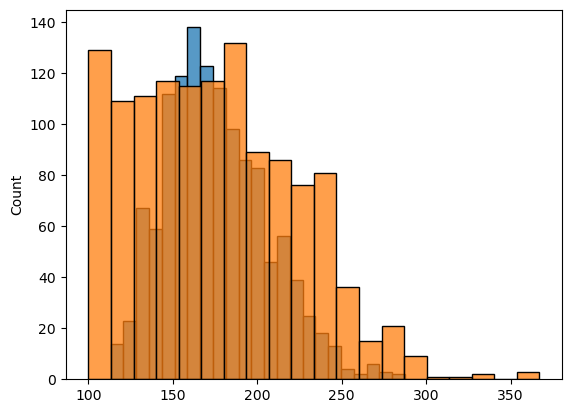

In [19]:
sns.histplot(y_val_pred)
sns.histplot(y_val)

## Question 3